In [1]:
import numpy as np
import xarray as xr
from modules.ADI import ADI
from modules.classes import Quantity2D, Analytic, Interpolate
from modules.tests import plot_mass_conservation, calculate_boundary_flux, integrate_concentration
import matplotlib.pyplot as plt

In [2]:
# Initialize a constant diffusion coefficient function
'''
diffusion = Analytic(lambda x, y: y**2)
diffusion.set_partial_x(lambda x, y: y)
diffusion.set_partial_y(lambda x, y: x)
'''


'\ndiffusion = Analytic(lambda x, y: y**2)\ndiffusion.set_partial_x(lambda x, y: y)\ndiffusion.set_partial_y(lambda x, y: x)\n'

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='x', ylabel='y', zlabel='z'>)

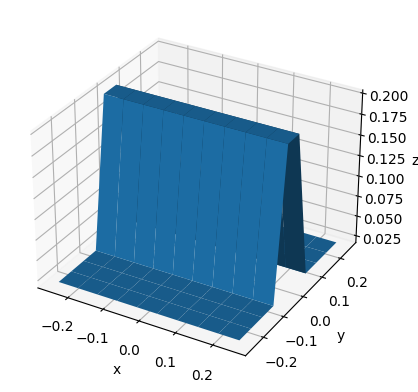

In [10]:
n_grid = 50
n_time = 1000
dt = 0.0001
dx = 0.01
dy = 0.01
conc = Quantity2D(
    n_grid,
    n_time,
    (-0.5*n_grid*dx, 0.5*n_grid*dx),
    (-0.5*n_grid*dy, 0.5*n_grid*dy),
    (0, dt*n_time),
)

diffarr = 0.02*np.ones((10, 10))
diffarr[:,4:-4] = 0.2 # Vary along x; partial_x should be constant
xint = np.linspace(-0.5*n_grid*dx, 0.5*n_grid*dx, 10)
yint = np.linspace(-0.5*n_grid*dy, 0.5*n_grid*dy, 10)
diffusion = Interpolate(diffarr, xint, yint, s=0)

diffusion.plot_2D(func='func')

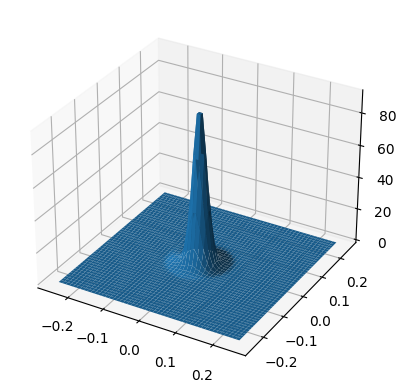

In [4]:
xcoords = conc.xcoords
ycoords = conc.ycoords
X, Y = np.meshgrid(xcoords, ycoords)
initial_condition =  100*np.exp(- (X**2 + Y**2)/(0.05*dx*n_grid)**2)
#initial_condition = np.empty_like(X)
#initial_condition[n_grid//2, n_grid//2] = 100

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, initial_condition)

In [5]:
result_ds = ADI(conc, diffusion, initial_condition)
# Issue with explicit component vectors blowing up to infinity/nan values

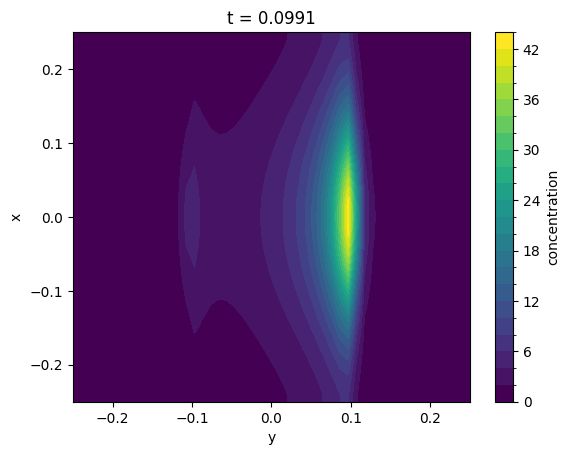

In [6]:
xr.plot.contourf(result_ds.isel(t=990), levels=30)

2.0308319189794268e-38
-8.882483763287017e-50
-2.5718039797968943e-48
-3.925699064492264e-47
-1.6593920104565473e-45
-4.8296117148822475e-45
-2.2186057642601974e-44
-1.6887398206865432e-43
-1.7287915003130955e-43
-2.9998869213931277e-44
4.042706794396245e-43
-3.633259125020549e-41
-4.4767497756758405e-41
-9.149731850431139e-41
1.6133449422520872e-41
-1.6196834989705674e-40
-9.5636673710588e-40
-1.4380369194757205e-39
1.3135519918631577e-39
-2.423606119754842e-39
-7.119112855540168e-39
-1.5050436394693253e-39
-2.618283268078156e-39
3.739900999010311e-38
5.8220896815507e-38
-8.747098920909648e-38
-2.788142756990997e-37
4.896019786363455e-37
2.122045149277627e-38
6.786835752714319e-38
-6.530629857698649e-37
1.0550356129149347e-37
-1.9418089212414338e-38
-2.8587813691916425e-36
-1.4191348200934547e-37
-3.970705642766438e-36
-6.343726135410452e-39
-7.226838918894273e-36
1.2452305498201621e-36
-1.0840790529091073e-35
-3.5164462676688374e-35
-2.2005559143282486e-36
-3.1920095568530774e-35
-6.

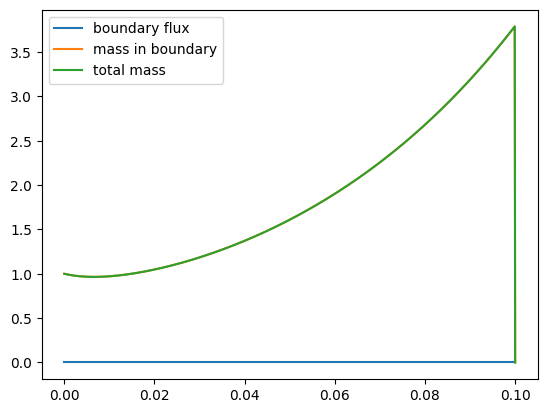

In [7]:
fig, ax = plot_mass_conservation(result_ds)

In [8]:
bflux = calculate_boundary_flux(result_ds)
tconc = integrate_concentration(result_ds)
print(bflux)
print(tconc)

2.0308319189794268e-38
-8.882483763287017e-50
-2.5718039797968943e-48
-3.925699064492264e-47
-1.6593920104565473e-45
-4.8296117148822475e-45
-2.2186057642601974e-44
-1.6887398206865432e-43
-1.7287915003130955e-43
-2.9998869213931277e-44
4.042706794396245e-43
-3.633259125020549e-41
-4.4767497756758405e-41
-9.149731850431139e-41
1.6133449422520872e-41
-1.6196834989705674e-40
-9.5636673710588e-40
-1.4380369194757205e-39
1.3135519918631577e-39
-2.423606119754842e-39
-7.119112855540168e-39
-1.5050436394693253e-39
-2.618283268078156e-39
3.739900999010311e-38
5.8220896815507e-38
-8.747098920909648e-38
-2.788142756990997e-37
4.896019786363455e-37
2.122045149277627e-38
6.786835752714319e-38
-6.530629857698649e-37
1.0550356129149347e-37
-1.9418089212414338e-38
-2.8587813691916425e-36
-1.4191348200934547e-37
-3.970705642766438e-36
-6.343726135410452e-39
-7.226838918894273e-36
1.2452305498201621e-36
-1.0840790529091073e-35
-3.5164462676688374e-35
-2.2005559143282486e-36
-3.1920095568530774e-35
-6.

In [1]:
from modules.tests import test_gaussian
import xarray as xr
result_ds, ads = test_gaussian()

In [2]:
result_ds

<xarray.DataArray 'concentration' (x: 50, y: 50, t: 500)> Size: 10MB
array([[[1.53485036e-23, 9.07142998e-22, 9.90858028e-22, ...,
         4.89543022e-12, 5.00217417e-12, 0.00000000e+00],
        [1.13316524e-22, 9.07142998e-22, 9.90858028e-22, ...,
         4.89543022e-12, 5.00217417e-12, 0.00000000e+00],
        [7.69740455e-22, 6.09184793e-21, 6.54869231e-21, ...,
         9.22827140e-12, 9.42052526e-12, 0.00000000e+00],
        ...,
        [7.69740455e-22, 6.09184793e-21, 6.54869231e-21, ...,
         9.22827140e-12, 9.42052526e-12, 0.00000000e+00],
        [1.13316524e-22, 9.07142998e-22, 9.90858028e-22, ...,
         4.89543022e-12, 5.00217417e-12, 0.00000000e+00],
        [1.53485036e-23, 9.07142998e-22, 9.90858028e-22, ...,
         4.89543022e-12, 5.00217417e-12, 0.00000000e+00]],

       [[1.13316524e-22, 9.07142998e-22, 9.90858028e-22, ...,
         4.89543022e-12, 5.00217417e-12, 0.00000000e+00],
        [8.36604981e-22, 9.07142998e-22, 9.90858028e-22, ...,
         4.89543022e-12, 5.00217417e-12, 0.00000000e+00],
        [5.68291964e-21, 6.09184793e-21, 6.54869231e-21, ...,
         9.22827140e-12, 9.42052526e-12, 0.00000000e+00],
...
        [5.68291964e-21, 6.09184793e-21, 6.54869231e-21, ...,
         9.22827140e-12, 9.42052526e-12, 0.00000000e+00],
        [8.36604981e-22, 9.07142998e-22, 9.90858028e-22, ...,
         4.89543022e-12, 5.00217417e-12, 0.00000000e+00],
        [1.13316524e-22, 9.07142998e-22, 9.90858028e-22, ...,
         4.89543022e-12, 5.00217417e-12, 0.00000000e+00]],

       [[1.53485036e-23, 9.07142998e-22, 9.90858028e-22, ...,
         4.89543022e-12, 5.00217417e-12, 0.00000000e+00],
        [1.13316524e-22, 9.07142998e-22, 9.90858028e-22, ...,
         4.89543022e-12, 5.00217417e-12, 0.00000000e+00],
        [7.69740455e-22, 6.09184793e-21, 6.54869231e-21, ...,
         9.22827140e-12, 9.42052526e-12, 0.00000000e+00],
        ...,
        [7.69740455e-22, 6.09184793e-21, 6.54869231e-21, ...,
         9.22827140e-12, 9.42052526e-12, 0.00000000e+00],
        [1.13316524e-22, 9.07142998e-22, 9.90858028e-22, ...,
         4.89543022e-12, 5.00217417e-12, 0.00000000e+00],
        [1.53485036e-23, 9.07142998e-22, 9.90858028e-22, ...,
         4.89543022e-12, 5.00217417e-12, 0.00000000e+00]]])
Coordinates:
  * x        (x) float64 400B -10.0 -9.592 -9.184 -8.776 ... 9.184 9.592 10.0
  * y        (y) float64 400B -10.0 -9.592 -9.184 -8.776 ... 9.184 9.592 10.0
  * t        (t) float64 4kB 0.0 0.002004 0.004008 0.006012 ... 0.996 0.998 1.0
Attributes:
    dx:                     0.40816326530612246
    dy:                     0.40816326530612246
    dt:                     0.002004008016032064
    n_grid:                 50
    n_time:                 500
    initial_condition:      [[1.53485036e-23 1.13316524e-22 7.69740455e-22 .....
    diffusion_coefficient:  1
    metadata:               Generated by crank_nicholson_1D

In [23]:
ads

<xarray.DataArray 'concentration' (x: 50, y: 50, t: 500)> Size: 10MB
array([[[1.53485036e-23, 1.69287944e-23, 1.86644152e-23, ...,
         5.26583642e-13, 5.39440369e-13, 5.52583729e-13],
        [1.13316524e-22, 1.24484930e-22, 1.36702234e-22, ...,
         1.43368149e-12, 1.46721063e-12, 1.50145283e-12],
        [7.69740455e-22, 8.42371656e-22, 9.21520751e-22, ...,
         3.74380833e-12, 3.82767695e-12, 3.91324671e-12],
        ...,
        [7.69740455e-22, 8.42371656e-22, 9.21520751e-22, ...,
         3.74380833e-12, 3.82767695e-12, 3.91324671e-12],
        [1.13316524e-22, 1.24484930e-22, 1.36702234e-22, ...,
         1.43368149e-12, 1.46721063e-12, 1.50145283e-12],
        [1.53485036e-23, 1.69287944e-23, 1.86644152e-23, ...,
         5.26583642e-13, 5.39440369e-13, 5.52583729e-13]],

       [[1.13316524e-22, 1.24484930e-22, 1.36702234e-22, ...,
         1.43368149e-12, 1.46721063e-12, 1.50145283e-12],
        [8.36604981e-22, 9.15392872e-22, 1.00123688e-21, ...,
         3.90335449e-12, 3.99063021e-12, 4.07967245e-12],
        [5.68291964e-21, 6.19433221e-21, 6.74941831e-21, ...,
         1.01929272e-11, 1.04108047e-11, 1.06328780e-11],
...
        [5.68291964e-21, 6.19433221e-21, 6.74941831e-21, ...,
         1.01929272e-11, 1.04108047e-11, 1.06328780e-11],
        [8.36604981e-22, 9.15392872e-22, 1.00123688e-21, ...,
         3.90335449e-12, 3.99063021e-12, 4.07967245e-12],
        [1.13316524e-22, 1.24484930e-22, 1.36702234e-22, ...,
         1.43368149e-12, 1.46721063e-12, 1.50145283e-12]],

       [[1.53485036e-23, 1.69287944e-23, 1.86644152e-23, ...,
         5.26583642e-13, 5.39440369e-13, 5.52583729e-13],
        [1.13316524e-22, 1.24484930e-22, 1.36702234e-22, ...,
         1.43368149e-12, 1.46721063e-12, 1.50145283e-12],
        [7.69740455e-22, 8.42371656e-22, 9.21520751e-22, ...,
         3.74380833e-12, 3.82767695e-12, 3.91324671e-12],
        ...,
        [7.69740455e-22, 8.42371656e-22, 9.21520751e-22, ...,
         3.74380833e-12, 3.82767695e-12, 3.91324671e-12],
        [1.13316524e-22, 1.24484930e-22, 1.36702234e-22, ...,
         1.43368149e-12, 1.46721063e-12, 1.50145283e-12],
        [1.53485036e-23, 1.69287944e-23, 1.86644152e-23, ...,
         5.26583642e-13, 5.39440369e-13, 5.52583729e-13]]])
Coordinates:
  * x        (x) float64 400B -10.0 -9.592 -9.184 -8.776 ... 9.184 9.592 10.0
  * y        (y) float64 400B -10.0 -9.592 -9.184 -8.776 ... 9.184 9.592 10.0
  * t        (t) float64 4kB 0.0 0.002004 0.004008 0.006012 ... 0.996 0.998 1.0
Attributes:
    n_grid:             50
    n_time:             500
    initial_condition:  [[0. 0. 0. ... 0. 0. 0.]\n [0. 0. 0. ... 0. 0. 0.]\n ...

In [3]:
diff = (result_ds - ads)/ads

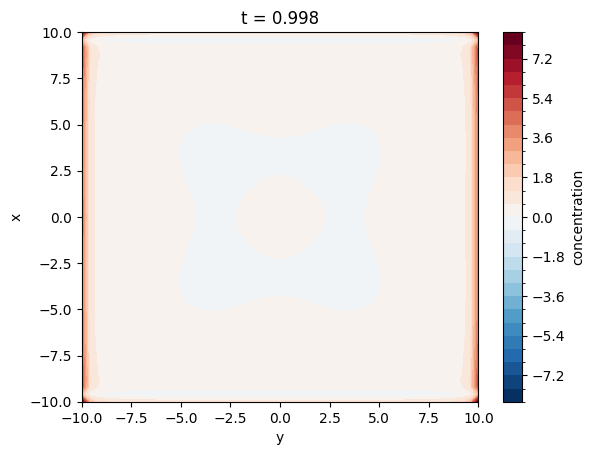

In [29]:
xr.plot.contourf(diff.isel(t=498), levels=30)

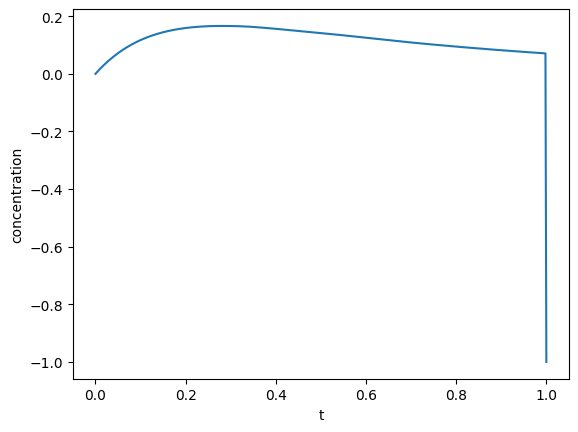

In [26]:
diff.median(dim=('x','y')).plot()

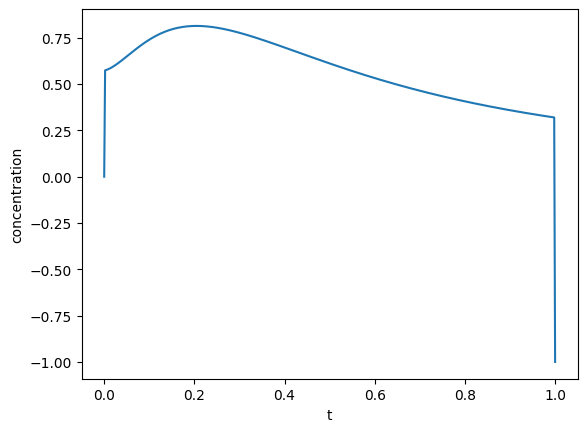

In [27]:
diff.mean(dim=('x','y')).plot()